# ДЗ №2 - обучение модели трехслойного перцептрона методом градиентного спуска

## (1)
В качестве теоретического задания в этом ДЗ предлагается провести вывод функции ошибки для задачи регрессии в предположении, что целевая переменная подчиняется распределению Лапласа. Также предлагается воспользоваться байесовским выводом и в том же предположении относительно распределения целевой переменной вывести форму функции потерь с условием лапласовского априорного распределения параметров модели.

## (2)
В этом ДЗ предлагается реализовать модель трехслойного перцептрона и обучение этой модели методом градиентного спуска.

На этот раз предлагается работать с реальными данными. Данные представляют из себя набор рукописных цифр. Это изображения размером 28х28. Каждому изображению поставлен в соответствие класс - арабская цифра. Задача модели - определить цифру, соответствующую произвольному изображению из тестового набора данных.

Так же, как и в ДЗ №1, предлагается реализовать функцию потерь и саму модель перцептрона в манере, схожей с построением модулей фреймворка pytorch.

В решении ожидается наличие следующих ключевых составляющих:<br />

- (текст) формулировка задачи
- (текст) формулировка признакового описания объектов
- (текст, формулы) формулировка модели многослойного перцептрона
- (текст, формулы) формулировка функции ошибки
- (текст, формулы) формулировка меры качества модели
- (текст, код и диаграммы) исследование исходных данных: распределение признаков и другие действия, дающие понимание о характере исходных данных
- (текст, код, диаграммы) фильтрация признаков (при необходимости), порождение признаков (при необходимости)
- (формулы, код, результаты, коммментарии) обучение модели методом градиентного спуска
- (код, результаты, комментарии) оценка качества модели на валидационной выборке

#### Код решения:
(можно использовать предлагаемые шаблоны)
- формулировка модели трехслойного перцептрона. Имеется в виду только один скрытый слой;
- формулировка функции ошибки;
- формулировка метрики (метрик);
- формулировка цикла оптимизации параметров.

#### Визуализация в решении:
- распределение признаков;
- распределение целевой переменной;
- отдельные экземпляры выборки в виде изображений;
- эволюция функции ошибки по ходу обучения;
- эволюция метрики(метрик) по ходу обучения

#### Выводы
- вывод о достаточности или избыточности данных для оценки параметров модели
- вывод о соотношении выразительности модели и ее обобщающей способности (наблюдаются ли явления переобучения или недообучения).

Примечание:<br />
Реализация перцептрона и других составляющих исследования может быть написана только с использованием библиотеки Numpy или scipy. Решения с использованием библиотек автоматического вычисления градиентов не засчитываются.

### Исходные данные

Исходные данные можно скачать [по этой ссылке](https://www.dropbox.com/s/y6ar7i7mb6fvoed/mnist.npz). Набор данных MNIST поставляется в различных вариантах. В варианте, доступном по приведенной ссылке, чтение исходных данных может быть выполнено следующим образом:

```
import numpy as np
mnist = np.load('mnist.npz')
x_train = mnist['x_train']
y_train = mnist['y_train']
x_test = mnist['x_test']
y_test = mnist['y_test']
```

### Многослойный перцептрон

Напомним, мы задаем мнолослойный перцептрон как сложную функцию, в которой используются линейные операции и поточечные нелинейные преобразования. Если входные данные (признаковое описание объекта) заданы вектором $x$, то функция перцептрона с одним скрытым слоем выглядит следующим образом:
$$
F(x) = \Psi\left(\phi\left( {x}\cdot\theta_1 + b_1 \right)\cdot\theta_2 + b_2\right),
$$
где $x$ имеется в виду без дополнительного единичного признака; $\phi$ - функция активации скрытого слоя; $\Psi$ - функция активации выходного слоя перцептрона.

Напомним также, что в задаче жесткой многоклассовой классификации на $K$ классов допустим вариант формулировки модели, такой что:
- количество признаков целевой переменной совпадает с количеством классов $K$;
- в качестве функции активации $\Psi$ может использоваться `softmax`:
$$
\Psi(h_i) = \frac{e^{h_i}}{\sum_{j=1}^{K}{e^{h_j}}}
$$
- в качестве функции потерь может использоваться перекрестная энтропия в многоклассовом варианте (приведено в записи для одного объекта):
$$
{\mathscr{L}}\left(\hat{y},y\right) = -\sum_{j=1}^{K}{y_j*ln\left(\hat{y}_j\right)},
$$
где $\hat{y}=F(x)$

В своем решении вы никак не ограничены в выборе функций активации $\phi$ или $\Psi$. Однако есть некоторые устоявшиеся практики применения функций `ReLU, sigmoid, tanh`.

### Особенности реализации функции `softmax`
Несложно заметить, что как в числителе, так и в знаменателе функции `softmax` стоит экспонента некоторого числа. При этом следует понимать, что разрядность чисел с плавающей точкой `float32`, `float64` и даже `float128` не бесконечны. Свойства экспоненты таковы, что, например, для переполнения разрядности чисел `float64` (максимум  $\sim1.78*10^{308}$) достаточно показателя, превышающего 710, что совсем немного. Поэтому в случае практической реализации функции `softmax` имеет смысл предусмотреть случаи, когда аргументы экспоненты велики или, наоборот, слишком малы.

В этом ДЗ кроме прочих заданий вам нужно реализовать вычислительно стабильную версию `softmax`.

### Особенности вычисления градиента функции потерь

В этом домашнем задании, также как и в ДЗ№1 предлагается реализовывать функцию потерь и отдельные вычислительные блоки перцептрона наследующими `Differentiable` для общности восприятия этих модулей как дифференцируемых по своим аргументам. По желанию можно вычислить градиент функции потерь по параметрам модели вручную (и далее реализовать его в коде), однако предпочитаемым способом будет реализация градиента каждого из вычислительных блоков по аргументу в методе `backward()` и использование этого результата в обобщенном виде, без упрощения. Этот вариант вычисления градиента функции потерь по параметрам модели называется "backpropagation" ("метод обратного распространения ошибки" или "метод обратной волны" у разных авторов).

Нелишним будет напомнить, что в некоторых случаях для вычисления компоненты градиента необходимо хранить значения, полученные на этапе вычисления функции $F(x)$. В вашем решении это может быть устроено по-разному. Но для тех, кто хочет придерживаться предложенного шаблона, введен атрибут `state` класса `Differentiable`.

# Решение

## Постановка задачи

Задачей является классификация рукописных цифр на изображениях из датасета MNIST

softmax применяется для нормировки вероятности к единице

## Препроцессинг

In [1]:
import numpy as np
from tqdm import tqdm

In [2]:
#%matplotlib inline

In [3]:
import matplotlib.pyplot as plt

In [4]:
mnist = np.load('./mnist.npz')
x_train = mnist['x_train']
y_train = mnist['y_train']
# Обратите внимание на то, что целевая переменная в виде целых чисел от 0 до 9, в то время как в формулах,
# приведенных выше, подразумевается one-hot кодирование целевой переменной
x_test = mnist['x_test']
y_test = mnist['y_test']

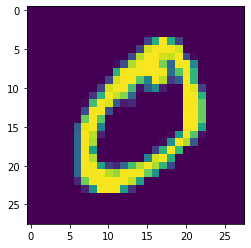

In [5]:
plt.imshow(x_train[1])

In [6]:
y_train[1]

0

выпрямление матрицы в вектор и нормировка

In [7]:
x_train.shape

(60000, 28, 28)

In [8]:
x_train = np.array(list(map(lambda x: x.reshape((784))/255, x_train)))
x_test = list(map(lambda x: x.reshape((784))/255, x_test))

In [9]:
x_train.shape

(60000, 784)

In [10]:
# for i in range(x_train.shape[-1]):
#     for j in range(x_train.shape[0]):
#         if x_train[j][i] == 0:

Добавим столбец единиц

In [11]:
from sklearn.preprocessing import PolynomialFeatures

poly_model = PolynomialFeatures(degree=1, include_bias=True)

x_train = poly_model.fit_transform(x_train)
x_test = poly_model.fit_transform(x_test)

one-hot encoding можно было бы импортировать из sklearn, но сделаем сами

In [12]:
def one_hot(index=None):
    zero_list = [0]*10
    zero_list[index] = 1
    return zero_list

In [13]:
y_train[1]

0

In [14]:
y_train = np.array(list(map(lambda x: one_hot(x), y_train)))

In [15]:
y_train[1]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [16]:
y_train.shape

(60000, 10)

## Реализация алгоритма

In [17]:
class Differentiable:
    def __init__(self):
        self.state = None
        pass
    
    def forward(self, *args):
        raise NotImplementedError()
    
    def backward(self, *args):
        raise NotImplementedError()

В качестве функции потерь используем перекрестную энтропию   
$$
{\mathscr{L}}\left(\hat{y},y\right) = -\sum_{j=1}^{K}{y_j*ln\left(\hat{y}_j\right)},
$$
где $\hat{y}=F(x)$

In [168]:
class loss(Differentiable):
    def __init__(self):
        super(loss, self).__init__()
    
    def forward(self, y_pred, y_train):
        # Этот метод реализует вычисление значения функции потерь
        # Подсказка: метод должен возвращать единственный скаляр - значение функции потерь
        self.state = y_train  
        self.cache = y_pred
        
        print('y_train', self.state)
        print('y_pred', y_pred)
        ### YOUR CODE HERE
        loss_value = sum(-sum(self.state * np.log(y_pred)))/self.state.shape[0]
        
        ###################
        #accuracy_counter:#
        ###################
        y_pred = np.array(y_pred)
        counter = 0
        print('AAAAAAAAAAAAAAAAA', y_pred.shape)
        for i in range(len(y_pred)):
            print('y_pred[i]', y_pred[i], 'max', max(y_pred[i]))
            print('y_train[i]', y_train[i], 'max', max(y_train[i]))
            if np.where(y_pred[i]==max(y_pred[i]))[0][0] == np.where(y_train[i]==max(y_train[i]))[0][0]:
                counter+=1
        accuracy = counter/len(y_pred)
    
                
        return loss_value, accuracy
    
    
    def backward(self):
        # Этот метод реализует вычисление градиента функции потерь по аргументу y_pred
        # Подсказка: метод должен возвращать вектор градиента функции потерь
        #           размерностью, совпадающей с размерностью аргумента y_pred
        
        ### YOUR CODE HERE
        y_pred = self.cache
        partial_grad = (y_pred - self.state).T 
        #print('(y_pred - self.state)', (y_pred - self.state))
        
        return partial_grad

In [146]:
class Linear(Differentiable):
    def __init__(self):
        super(Linear, self).__init__()
        self.theta = None
    
    def __call__(self, x_train):
        # этот метод предназначен для вычисления значения целевой переменной
        return self.forward(x_train)
    
    def backward(self, upstream_grad):
        # Этот метод реализует вычисление компоненты градиента функции потерь

        ### YOUR CODE HERE
#         print('upstream_grad_l1', upstream_grad.shape)
#         print('x_train_l1', self.cache.shape)
        partial_grad = upstream_grad.T @ self.cache
        #partial_grad = x_train 
        
#         print('partial_grad', partial_grad[0][0])
        
        return partial_grad

    
    def forward(self, x_train):
        # этот метод предназначен для применения модели к данным
        assert x_train.ndim == 2, "X should be 2-dimensional: (N of objects, n of features)"
        
#         x_train = poly_model.fit_transform(x_train)
        
        if (self.theta is None):
            # Если вектор параметров еще не инициализирован, его следует инициализировать
            # Подсказка: длина вектора параметров может быть получена из размера матрицы X

            ### YOUR CODE HERE
            self.theta = np.random.randn(x_train.shape[-1]*10).reshape(x_train.shape[-1],10)
        
        
        # Здесь следует собственно применить модель к входным данным
        
        ### YOUR CODE HERE
        
        y_pred = x_train@self.theta
        
        self.cache = x_train
        
        return y_pred

In [147]:
class Linear_hiden(Differentiable):
    def __init__(self):
        super(Linear_hiden, self).__init__()
        self.theta = None
    
    def __call__(self, x_train):
        # этот метод предназначен для вычисления значения целевой переменной
        return self.forward(x_train)
    
    def backward(self, upstream_grad):
        # Этот метод реализует вычисление компоненты градиента функции потерь

        ### YOUR CODE HERE
        print('upstream_grad_l2', upstream_grad.shape)
        print('x_train_l2', self.cache.shape)
        partial_grad = upstream_grad.T @ self.cache.T

        
        print('partial_grad', partial_grad[0][0])
        
        return partial_grad

    
    def forward(self, x_train):
        # этот метод предназначен для применения модели к данным
        assert x_train.ndim == 2, "X should be 2-dimensional: (N of objects, n of features)"
        
#         x_train = poly_model.fit_transform(x_train)
        
        if (self.theta is None):
            # Если вектор параметров еще не инициализирован, его следует инициализировать
            # Подсказка: длина вектора параметров может быть получена из размера матрицы X

            ### YOUR CODE HERE
            self.theta = np.random.randn(x_train.shape[-1]*10).reshape(x_train.shape[-1],10)
        
        
        # Здесь следует собственно применить модель к входным данным
        
        ### YOUR CODE HERE
        
        y_pred = x_train@self.theta
        
        self.cache = self.theta
        
        return y_pred

In [148]:
class Activation(Differentiable):
    def __init__(self):
        super(Activation, self).__init__()
        self.theta = None
    
    def __call__(self, x_train):
        # этот метод предназначен для вычисления значения целевой переменной
        return self.forward(x_train)
    
    def backward(self, upstream_grad):
        # Этот метод реализует вычисление компоненты градиента функции потерь
        
        ### YOUR CODE HERE
        #print('np.maximum(self.value_sign, 0).T', np.maximum(self.value_sign, 0).T)
        print('activation', upstream_grad.shape, np.maximum(self.value_sign, 0).shape)
        
        partial_grad =  upstream_grad * np.maximum(self.value_sign, 0)
        #partial_grad = upstream_grad
        
#         print('partial_activ ', partial_grad.shape, '= upstream ', upstream_grad.shape, 
#                            ' * sign ', np.maximum(self.value_sign, 0).T.shape)
        
        return partial_grad
    
    def forward(self, x_train):
        # Здесь следует собственно применить модель к входным данным
        # Подсказка: удобно расширить матрицу X дополнительным признаком,
        #            чтобы применять матричные операции, очень эффективно реализованные в numpy

        ### YOUR CODE HERE
        #x_train = poly_model.fit_transform(x_train)
        print('x_train_activ', x_train)
        self.value_sign = np.sign(x_train)
    
        y_pred = np.maximum(x_train, 0)
        #y_pred = x_train
        
        return y_pred

In [149]:
class Softmax(Differentiable):
    def __init__(self):
        super(Softmax, self).__init__()
        self.theta = None
    
    def __call__(self, *args):
        # этот метод предназначен для вычисления значения целевой переменной
        return self.forward(x_train)
    
    def backward(self):
        # Этот метод реализует вычисление компоненты градиента функции потерь
        
        ### YOUR CODE HERE
        partial_grad = np.zeros((x_train.shape))
        #softmax_val = Softmax.forward(x_train)
        softmax_val = self.forward_val
        
        for i in range(partial_grad.shape[0]*len(softmax_val[0])):
            for j in range(partial_grad.shape[1]):
                if i != j:
                    partial_grad[i:i+len(softmax_val[i])][j] = softmax_val[i] * softmax_val[j]
                else:
                    partial_grad[i:i+len(softmax_val[i])][j] = softmax_val[i]*(1 - softmax_val[i])
        
        return partial_grad 
    
    def forward(self, y_in):
        # args = [x]
        # Здесь следует собственно применить модель к входным данным
        # Подсказка: удобно расширить матрицу X дополнительным признаком,
        #            чтобы применять матричные операции, очень эффективно реализованные в numpy

        ### YOUR CODE HERE
        y_pred_out = []
        for line in y_in:
            shift = line - np.max(line)
            exps = np.exp(line)
            y_pred_line = exps / np.sum(exps)
            
            y_pred_out.append(y_pred_line)

        self.forward_val = y_pred_out
        
        return y_pred_out

In [169]:
class Perceptron(Differentiable):
    def __init__(self):
        super(Perceptron, self).__init__()
        
        self.Sm=Softmax()
        self.activ=Activation()
        self.lr_1=Linear()
        self.lr_2=Linear_hiden()
        self.parameters = None
        
    
    def __call__(self, *args):
        # этот метод предназначен для вычисления значения целевой переменной
        return self.forward(x_train)
    
    def backward(self, x_train, upstream_grad):
        # Этот метод реализует вычисление компоненты градиента функции потерь
        
        #partial_grad = self.Sm.backward(self.activ.backward(self.lr.backward(x_train)))
#         partial_grad = self.activ.backward(self.lr.backward(x_train))
        #print('percept upstream_grad', upstream_grad.shape)
        #print('percept local_grad ', self.lr.backward(x_train, self.activ.backward()).shape)
        partial_grad_1 = self.lr_1.backward(self.activ.backward(self.lr_2.backward(upstream_grad)))
        #partial_grad = self.lr.backward(x_train)
        
        return partial_grad_1
    
    def forward(self, x_train, theta):
        # Здесь следует собственно применить модель к входным данным
        # Подсказка: удобно расширить матрицу X дополнительным признаком,
        #            чтобы применять матричные операции, очень эффективно реализованные в numpy
        
        #y_pred = self.Sm.forward(self.lr.forward(x_train))
        y_pred = self.Sm.forward(self.lr_2.forward(self.activ.forward(self.lr_1.forward(x_train))))
        
        return y_pred

In [170]:
def train_loop(x_train, y_train, model, loss_fn, epochs=100):
    np.random.seed(1)
    loss_history = []
    accuracy_history = []
    pbar = tqdm(total=epochs)
    for epoch in range(epochs):
        # В этом цикле следует реализовать итеративную процедуру оптимизации параметров модели model,
        #        руководствуясь функцией потерь loss_fn
        
        ### YOUR CODE HERE
        #batch selection
        batch_size = 10
        alpha = 1e-2
        
        concat = np.concatenate((x_train, y_train), axis=1)
        #np.random.shuffle(concat)
        concat = concat[:batch_size]
        x_batch_train = concat[:,0:785]
        y_batch_train = concat[:,785:795]
#         x_batch_train=np.array([x_train[1]])
#         y_batch_train=np.array([y_train[1]])
            
        loss_value, accuracy = loss_fn.forward(model.forward(x_batch_train, model.lr_1.theta), y_batch_train)
        #grad = loss_fn.backward(model.forward(x_train), model.backward(x_train))
        grad_1 = model.backward(x_batch_train, loss_fn.backward())
        grad_2 = None
#         print('grad', (alpha*grad.T[0][:10]))
#         print('theta', model.lr_1.theta[0][:10])

        model.lr_1.theta = model.lr_1.theta - alpha*grad_1.T
        #model.lr_2.theta = model.lr_2.theta - alpha*grad_2.T
        
        loss_history.append(loss_value)
        accuracy_history.append(accuracy)
        pbar.update(1)
        #print(loss_value)
        pbar.set_postfix({'loss': loss_value})
        print('----------------')
    pbar.close()
    return loss_history, accuracy_history

In [171]:
obj_fn = loss()
model = Perceptron()
loss_history, accuracy_history = train_loop(x_train, y_train, model, obj_fn, epochs=30)
















  0%|          | 0/30 [00:00<?, ?it/s]














  3%|▎         | 1/30 [00:00<00:14,  2.06it/s]














  3%|▎         | 1/30 [00:00<00:14,  2.06it/s, loss=29.5]

x_train_activ [[-13.92850683  -8.0674499   -6.42433508  -5.96489216 -19.30512189
    0.15281851  12.6143932    5.87761329  11.11346296  -8.88229746]
 [ -1.22663357  -9.62081226   3.478469    -2.68726172  -8.0874834
   -4.00295714  22.30691759   6.28551877  12.03780748  11.49396505]
 [ -7.73827904  -2.43335871  -7.47086299   2.13218733  -7.47663023
   -8.60738216   5.8383358    3.88401786   8.0327621    2.69778051]
 [ -1.2497249   -1.4999869  -22.18662097  -4.27529821  -9.21132592
    0.3876207    2.67319573  -5.46616896   3.70450465  -9.90857081]
 [ -4.90375713  -1.65712723   5.45998512   4.66982927 -16.28376652
   11.13814636   8.46135652  -3.7403537   11.95578743   6.38555281]
 [ -5.86297977  -5.25628367  11.18645011   7.56806267  -6.63603895
   -4.95754752   4.91943954   2.83813707  17.64972788  -1.64732904]
 [ -0.28323259 -15.22890984 -13.69995924  -3.39721471  -6.90968669
    6.11492576   2.89074889  -2.0465764   11.52962619  -6.59681221]
 [-13.04909436  -6.4914457  -16.02012373  
















  7%|▋         | 2/30 [00:00<00:13,  2.09it/s, loss=29.5]














  7%|▋         | 2/30 [00:00<00:13,  2.09it/s, loss=19.6]

x_train_activ [[-13.78643236  -8.0674499   -6.33288081  -7.02646057 -19.30512189
    0.58509232   9.2717843    1.94111092   5.93908861  -9.36219692]
 [ -1.09415644  -9.62081226   4.02333663  -3.49575497  -8.0874834
   -3.77854625  19.22868771   1.52206178   8.17616297  10.69361092]
 [ -7.60308317  -2.43335871  -7.55175083   1.63512822  -7.47663023
   -8.55334449   4.96073246   1.21866432   5.84870111   2.10891607]
 [ -1.15238713  -1.4999869  -22.25510023  -4.91967574  -9.21132592
    0.34391748   0.27739317  -7.09324671   0.75815258 -10.12571765]
 [ -4.75153911  -1.65712723   5.35202095   3.3539056  -16.28376652
   10.93813571   6.57650965  -6.00506681   8.55311043   6.00010138]
 [ -5.66953471  -5.25628367  10.66389257   6.28852678  -6.63603895
   -4.93105632   3.43135066   0.81434172  12.09686838  -2.13816739]
 [ -0.18468515 -15.22890984 -13.76795533  -5.00097134  -6.90968669
    5.67841671   0.64738643  -3.66445983   8.7023052   -6.80723166]
 [-12.84127871  -6.4914457  -16.04580464  
















 10%|█         | 3/30 [00:01<00:13,  2.00it/s, loss=19.6]














 10%|█         | 3/30 [00:01<00:13,  2.00it/s, loss=13.2]

x_train_activ [[-13.64435793  -8.0674499   -6.24247953  -8.0256921  -19.30512189
    0.9150288    5.32929551  -0.53443007   2.01741729  -9.84126351]
 [ -0.96167935  -9.62081226   4.56704387  -4.24073639  -8.0874834
   -3.63297319  15.61079234  -1.98783444   5.39325897   9.89424168]
 [ -7.46788734  -2.43335871  -7.63324869   1.21270773  -7.47663023
   -8.53083633   3.71630926  -0.67988782   4.29965373   1.52232309]
 [ -1.05504939  -1.4999869  -22.32429599  -5.51944894  -9.21132592
    0.159702    -2.23766955  -7.93397958  -1.34099374 -10.34240808]
 [ -4.59932113  -1.65712723   5.24276862   2.10018116 -16.28376652
   10.63100565   4.3849739   -7.32108452   6.0216454    5.6156711 ]
 [ -5.4760897   -5.25628367  10.13910327   5.10200766  -6.63603895
   -5.00668639   1.45408965   0.05069605   7.65853162  -2.62783021]
 [ -0.08613774 -15.22890984 -13.83665174  -6.58457375  -6.90968669
    5.10301517  -1.66626877  -4.58382648   6.53773338  -7.01714054]
 [-12.63346312  -6.4914457  -16.07300749  
















 13%|█▎        | 4/30 [00:02<00:13,  1.98it/s, loss=13.2]














 13%|█▎        | 4/30 [00:02<00:13,  1.98it/s, loss=8.3] 

x_train_activ [[-1.35022891e+01 -8.06744990e+00 -6.16959725e+00 -8.99616560e+00
  -1.93051219e+01  8.38531278e-01  1.28080882e+00 -7.69596350e-02
  -3.30529199e-01 -1.02525823e+01]
 [-8.29207501e-01 -9.62081226e+00  5.07781123e+00 -4.96560389e+00
  -8.08748340e+00 -3.73610035e+00  1.20593294e+01 -1.42785058e+00
   3.67235864e+00  9.20900178e+00]
 [-7.33269687e+00 -2.43335871e+00 -7.72073265e+00  8.06750527e-01
  -7.47663023e+00 -8.58850993e+00  2.58857079e+00 -6.46871944e-01
   3.09296243e+00  1.01243745e+00]
 [-9.57715496e-01 -1.49998690e+00 -2.24012782e+01 -6.10254261e+00
  -9.21132592e+00 -1.87574584e-01 -3.67438183e+00 -7.63263020e+00
  -2.60717733e+00 -1.05282396e+01]
 [-4.44710918e+00 -1.65712723e+00  5.11978298e+00  8.83074753e-01
  -1.62837665e+01  1.01729492e+01  2.76869340e+00 -6.81321713e+00
   4.14359287e+00  5.28676958e+00]
 [-5.28265236e+00 -5.25628367e+00  9.59895712e+00  3.94407264e+00
  -6.63603895e+00 -5.29170276e+00 -9.28666074e-02  1.63018425e+00
   4.11113328e+00 -
















 17%|█▋        | 5/30 [00:02<00:12,  2.02it/s, loss=8.3]














 17%|█▋        | 5/30 [00:02<00:12,  2.02it/s, loss=4.59]

x_train_activ [[-12.79223063  -8.0674499   -6.09833253  -9.21627741 -19.30512189
    0.98636096  -3.02831624   0.3798438   -1.89343026 -10.64574175]
 [ -0.32487757  -9.62081226   5.58821454  -5.19837501  -8.0874834
   -3.67766892   8.01020384  -0.86857918   2.44289433   8.53773932]
 [ -7.02506461  -2.43335871  -7.80995203   0.56335385  -7.47663023
   -8.58969413   1.12872042  -0.6142178    2.0941447    0.56820713]
 [ -0.5372453   -1.4999869  -22.48062536  -6.24592576  -9.21132592
   -0.27275801  -5.48450097  -7.33172961  -3.67853842 -10.70159768]
 [ -3.71082118  -1.65712723   4.9875158    0.63435248 -16.28376652
    9.86182229   0.49627447  -6.3060764    2.38241126   4.99181165]
 [ -4.6085976   -5.25628367   9.05461839   3.48583344  -6.63603895
   -5.40061393  -3.1198744    3.20811517   0.90437845  -3.43743274]
 [  1.21147622 -15.22890984 -13.99247749  -8.25734661  -6.90968669
    3.78423502  -4.90782074  -4.0972162    3.38893812  -7.36118659]
 [-11.60677721  -6.4914457  -16.17177197 -
















 20%|██        | 6/30 [00:03<00:12,  1.97it/s, loss=4.59]














 20%|██        | 6/30 [00:03<00:12,  1.97it/s, loss=3.27]

x_train_activ [[-12.15717516  -8.0674499   -5.83596449 -10.24498535 -19.30512189
    0.93280689  -4.29581824   0.29790293  -1.87036733 -10.90327088]
 [  0.13003566  -9.62081226   6.2950128   -6.36362192  -8.0874834
   -3.89432869   6.29903507  -0.97350107   2.97607681   8.00674339]
 [ -6.74093314  -2.43335871  -7.79263582  -0.1770523   -7.47663023
   -8.72810144   0.84769771  -0.97944241   2.02457647   0.31241252]
 [ -0.15957613  -1.4999869  -22.44507317  -6.99599735  -9.21132592
   -0.53242081  -5.99732167  -7.47659212  -3.57651646 -10.76049118]
 [ -3.05170892  -1.65712723   4.94546087  -1.12259778 -16.28376652
    8.97137546   0.3390342   -6.54311128   3.32274182   5.05859693]
 [ -3.99858887  -5.25628367   8.97301375   1.50795305  -6.63603895
   -5.85213316  -3.91866054   3.21436343   0.84764682  -3.59314562]
 [  2.26662328 -15.22890984 -13.99070957  -9.09958856  -6.90968669
    3.02131383  -5.23009768  -4.2491664    3.10942455  -7.37126884]
 [-10.86902635  -6.4914457  -15.95986304 -
















 23%|██▎       | 7/30 [00:03<00:11,  1.98it/s, loss=3.27]














 23%|██▎       | 7/30 [00:03<00:11,  1.98it/s, loss=2.48]

x_train_activ [[-11.70361189  -8.0674499   -5.55737304 -10.46408723 -19.30512189
    1.18877427  -4.80829953   0.29525052  -3.00668986 -11.23262439]
 [  0.37618052  -9.62081226   7.02568663  -6.59457217  -8.0874834
   -3.77751031   5.16522814  -1.02675659   2.16848926   7.3760167 ]
 [ -6.51635389  -2.43335871  -7.7652673   -0.30518827  -7.47663023
   -8.70457418   0.99698057  -1.32257053   1.27165156   0.09606486]
 [  0.12450758  -1.4999869  -22.39462423  -7.14369671  -9.21132592
   -0.56225009  -6.16167444  -7.59459394  -4.33821287 -10.88398024]
 [ -2.55557764  -1.65712723   4.96411072  -1.36088518 -16.28376652
    8.73990425   0.23259371  -6.74511399   2.16746322   4.91178921]
 [ -3.54394466  -5.25628367   8.90599942   1.0185532   -6.63603895
   -5.88479494  -4.21045068   3.27296269  -1.42880618  -3.85811257]
 [  3.08480811 -15.22890984 -13.96542613  -9.23682266  -6.90968669
    2.65475325  -5.33220556  -4.36960078   1.85555354  -7.46963536]
 [-10.33278511  -6.4914457  -15.72135417 -
















 27%|██▋       | 8/30 [00:04<00:11,  1.94it/s, loss=2.48]














 27%|██▋       | 8/30 [00:04<00:11,  1.94it/s, loss=1.8] 

x_train_activ [[-11.28703134  -8.0674499   -5.2547734  -10.85590702 -19.30512189
    1.25332198  -5.16236902   0.23624502  -2.36931862 -11.44899755]
 [  0.64238368  -9.62081226   7.76768191  -7.00758038  -8.0874834
   -3.88687534   4.24406982  -1.15456168   3.20277194   6.88685595]
 [ -6.33219658  -2.43335871  -7.72177507  -0.53433375  -7.47663023
   -8.78841153   1.12188439  -1.67184691   1.66448643   0.02769975]
 [  0.78447668  -1.4999869  -22.32874623  -7.40782741  -9.21132592
   -0.72911801  -6.18806103  -7.75383005  -3.87191071 -10.92700204]
 [ -2.11421858  -1.65712723   4.97782124  -1.78701444 -16.28376652
    8.07846187   0.57439563  -7.01777282   3.59145694   4.99551556]
 [ -3.08298128  -5.25628367   8.92394069   0.14335968  -6.63603895
   -6.18469971  -4.25958469   3.11336348  -0.49608866  -3.95589111]
 [  3.62058429 -15.22890984 -13.9335815   -9.48223834  -6.90968669
    2.1563532   -5.24743252  -4.52255841   2.26247348  -7.46616658]
 [ -9.75287539  -6.4914457  -15.44780297 -
















 30%|███       | 9/30 [00:04<00:11,  1.89it/s, loss=1.8]














 30%|███       | 9/30 [00:04<00:11,  1.89it/s, loss=1.57]

x_train_activ [[-11.00770524  -8.0674499   -5.04615998 -11.0691083  -19.30512189
    1.57151037  -5.56659459   0.45208088  -2.36625293 -11.68942858]
 [  0.80527597  -9.62081226   8.32049356  -7.23231095  -8.0874834
   -3.69914434   3.36209149  -1.04388936   3.42497035   6.41528518]
 [ -6.20979309  -2.43335871  -7.70472816  -0.65901891  -7.47663023
   -8.72513323   1.19535808  -1.79664583   1.63617239  -0.10111438]
 [  1.19859981  -1.4999869  -22.29660687  -7.5515491   -9.21132592
   -0.69135636  -6.3192064   -7.74535076  -3.89608935 -11.01417086]
 [ -1.81427857  -1.65712723   4.95804793  -2.01888457 -16.28376652
    8.03238278   0.48420261  -7.03368987   3.53154166   4.901921  ]
 [ -2.7789989   -5.25628367   8.87175151  -0.33286022  -6.63603895
   -6.10541407  -4.49896677   3.27870701  -0.5028961   -4.13984956]
 [  4.01471174 -15.22890984 -13.92650301  -9.61577662  -6.90968669
    1.98688495  -5.33079224  -4.50198585   2.00805305  -7.53258218]
 [ -9.37252836  -6.4914457  -15.27494883 -
















 33%|███▎      | 10/30 [00:05<00:10,  1.92it/s, loss=1.57]














 33%|███▎      | 10/30 [00:05<00:10,  1.92it/s, loss=1.48]

x_train_activ [[-10.84846669  -8.0674499   -5.05483928 -11.0691083  -19.30512189
    1.85736543  -5.63148551   0.56130678  -2.35210008 -11.74390449]
 [  0.91297943  -9.62081226   8.43283008  -7.23231095  -8.0874834
   -3.52850977   3.12840146  -0.99341839   3.52288558   6.27873475]
 [ -6.13887465  -2.43335871  -7.75206411  -0.65901891  -7.47663023
   -8.66528725   1.35802615  -1.86399621   1.63441184  -0.10500093]
 [  1.44935801  -1.4999869  -22.35109413  -7.5515491   -9.21132592
   -0.65573242  -6.3022493   -7.74566845  -3.89687521 -11.01819506]
 [ -1.64709153  -1.65712723   4.78807771  -2.01888457 -16.28376652
    7.99421729   0.64775467  -7.05062074   3.52484095   4.95518402]
 [ -2.60263273  -5.25628367   8.67956766  -0.33286022  -6.63603895
   -6.03187063  -4.44969317   3.34072387  -0.48971723  -4.15081544]
 [  4.21205857 -15.22890984 -14.00031394  -9.61577662  -6.90968669
    1.84017881  -5.27602484  -4.49471815   1.92422067  -7.51954431]
 [ -9.15053463  -6.4914457  -15.34276228 -
















 37%|███▋      | 11/30 [00:05<00:09,  1.92it/s, loss=1.48]














 37%|███▋      | 11/30 [00:05<00:09,  1.92it/s, loss=1.43]

x_train_activ [[-10.7414502   -8.0674499   -5.08074539 -11.0691083  -19.30512189
    2.10369544  -5.66715981   0.63193679  -2.31689375 -11.77701604]
 [  0.98774141  -9.62081226   8.48655764  -7.23231095  -8.0874834
   -3.38449883   2.98074894  -0.96587912   3.60962565   6.19119233]
 [ -6.08700497  -2.43335871  -7.79582315  -0.65901891  -7.47663023
   -8.61437699   1.47593167  -1.90559574   1.66528119  -0.10540157]
 [  1.62340086  -1.4999869  -22.40195846  -7.5515491   -9.21132592
   -0.63075045  -6.28457542  -7.74869519  -3.88269647 -11.0179517 ]
 [ -1.53460242  -1.65712723   4.64535154  -2.01888457 -16.28376652
    7.93915451   0.7768878   -7.06747584   3.55089738   5.00034509]
 [ -2.48003685  -5.25628367   8.50816621  -0.33286022  -6.63603895
   -5.97866141  -4.40403591   3.35586461  -0.45322943  -4.15258306]
 [  4.33356732 -15.22890984 -14.06461456  -9.61577662  -6.90968669
    1.69429747  -5.23095609  -4.49118536   1.90681607  -7.50682362]
 [ -8.99764182  -6.4914457  -15.41792895 -
















 40%|████      | 12/30 [00:06<00:09,  1.92it/s, loss=1.43]














 40%|████      | 12/30 [00:06<00:09,  1.92it/s, loss=1.39]

x_train_activ [[-10.66019655  -8.0674499   -5.11289367 -11.0691083  -19.30512189
    2.31985366  -5.69420257   0.68767522  -2.27846907 -11.80167822]
 [  1.04594075  -9.62081226   8.51448082  -7.23231095  -8.0874834
   -3.25951844   2.86825744  -0.94631992   3.68442406   6.12506063]
 [ -6.04336971  -2.43335871  -7.8365291   -0.65901891  -7.47663023
   -8.56953512   1.56455929  -1.93233719   1.70838185  -0.10529927]
 [  1.75419466  -1.4999869  -22.44929732  -7.5515491   -9.21132592
   -0.61267992  -6.27069645  -7.75100143  -3.8661118  -11.0172211 ]
 [ -1.44880893  -1.65712723   4.52152726  -2.01888457 -16.28376652
    7.87624819   0.8770894   -7.08124835   3.58206789   5.03659395]
 [ -2.38389139  -5.25628367   8.35010018  -0.33286022  -6.63603895
   -5.93856766  -4.36871425   3.35263088  -0.41409843  -4.15289917]
 [  4.41917516 -15.22890984 -14.1219101   -9.61577662  -6.90968669
    1.55111059  -5.19593674  -4.48733381   1.91277721  -7.4963693 ]
 [ -8.87955333  -6.4914457  -15.4933205  -
















 43%|████▎     | 13/30 [00:06<00:08,  1.92it/s, loss=1.39]














 43%|████▎     | 13/30 [00:06<00:08,  1.92it/s, loss=1.36]

x_train_activ [[-10.59521364  -8.0674499   -5.14831789 -11.0691083  -19.30512189
    2.51258689  -5.71677731   0.73241303  -2.24036526 -11.82167247]
 [  1.0933211   -9.62081226   8.52742064  -7.23231095  -8.0874834
   -3.14885955   2.77605976  -0.93348649   3.75004178   6.07132581]
 [ -6.00504137  -2.43335871  -7.87508339  -0.65901891  -7.47663023
   -8.52914362   1.63540733  -1.95215025   1.7562463   -0.10516445]
 [  1.85616182  -1.4999869  -22.49409921  -7.5515491   -9.21132592
   -0.59926379  -6.25976508  -7.75430318  -3.8494364  -11.01655766]
 [ -1.37979959  -1.65712723   4.41038338  -2.01888457 -16.28376652
    7.80981753   0.95768184  -7.09540769   3.61306019   5.06631994]
 [ -2.30476123  -5.25628367   8.20088459  -0.33286022  -6.63603895
   -5.90742909  -4.34081945   3.33552498  -0.37590695  -4.15302594]
 [  4.48343358 -15.22890984 -14.17443564  -9.61577662  -6.90968669
    1.41238601  -5.16787837  -4.48473397   1.92932669  -7.48776689]
 [ -8.78389102  -6.4914457  -15.56807104 -
















 47%|████▋     | 14/30 [00:07<00:08,  1.95it/s, loss=1.36]














 47%|████▋     | 14/30 [00:07<00:08,  1.95it/s, loss=1.33]

x_train_activ [[-10.54143596  -8.0674499   -5.18608645 -11.0691083  -19.30512189
    2.68671176  -5.73634622   0.77113653  -2.20381553 -11.838698  ]
 [  1.13302528  -9.62081226   8.53019127  -7.23231095  -8.0874834
   -3.04935906   2.69742341  -0.92415176   3.80844561   6.02570426]
 [ -5.97057843  -2.43335871  -7.91227507  -0.65901891  -7.47663023
   -8.49216658   1.69519145  -1.96740504   1.8051653   -0.10510783]
 [  1.93756893  -1.4999869  -22.53727214  -7.5515491   -9.21132592
   -0.58899473  -6.2508901   -7.75784528  -3.83340798 -11.01607249]
 [ -1.3223274   -1.65712723   4.30785514  -2.01888457 -16.28376652
    7.74240271   1.02471252  -7.10924491   3.64233673   5.09125302]
 [ -2.23761792  -5.25628367   8.05715276  -0.33286022  -6.63603895
   -5.88253366  -4.31791203   3.31098449  -0.33971665  -4.15327915]
 [  4.53388933 -15.22890984 -14.22376916  -9.61577662  -6.90968669
    1.27953722  -5.14463108  -4.48252844   1.95072801  -7.480584  ]
 [ -8.70396974  -6.4914457  -15.64258182 -
















 50%|█████     | 15/30 [00:07<00:07,  1.99it/s, loss=1.33]














 50%|█████     | 15/30 [00:07<00:07,  1.99it/s, loss=1.31]

x_train_activ [[-10.49585192  -8.0674499   -5.22553931 -11.0691083  -19.30512189
    2.84605607  -5.75372639   0.80547813  -2.16908528 -11.85370245]
 [  1.16694213  -9.62081226   8.52571607  -7.23231095  -8.0874834
   -2.95859187   2.62847866  -0.91739945   3.86122568   5.98575208]
 [ -5.93919229  -2.43335871  -7.94849674  -0.65901891  -7.47663023
   -8.45783137   1.74769467  -1.97989322   1.85351707  -0.10516745]
 [  2.00361914  -1.4999869  -22.57927146  -7.5515491   -9.21132592
   -0.58071405  -6.24350742  -7.7617197   -3.81815392 -11.01579505]
 [ -1.27329043  -1.65712723   4.21165085  -2.01888457 -16.28376652
    7.67579408   1.08187533  -7.12310713   3.66967823   5.11251247]
 [ -2.17948084  -5.25628367   7.91722571  -0.33286022  -6.63603895
   -5.86183326  -4.29851116   3.28135379  -0.30554478  -4.15377572]
 [  4.57495197 -15.22890984 -14.27077276  -9.61577662  -6.90968669
    1.15380111  -5.12487567  -4.48078636   1.97411978  -7.47452153]
 [ -8.63577988  -6.4914457  -15.71692201 -
















 53%|█████▎    | 16/30 [00:08<00:06,  2.02it/s, loss=1.31]














 53%|█████▎    | 16/30 [00:08<00:06,  2.02it/s, loss=1.29]

x_train_activ [[-10.45641346  -8.0674499   -5.26628636 -11.0691083  -19.30512189
    2.99359893  -5.76944483   0.83672276  -2.13625699 -11.86726021]
 [  1.19640354  -9.62081226   8.51580358  -7.23231095  -8.0874834
   -2.8746998    2.56678624  -0.9123946    3.90946806   5.949959  ]
 [ -5.91030455  -2.43335871  -7.9840106   -0.65901891  -7.47663023
   -8.42555365   1.79513293  -1.99047524   1.90051043  -0.10535384]
 [  2.05788906  -1.4999869  -22.62040335  -7.5515491   -9.21132592
   -0.57353234  -6.2372571   -7.76579073  -3.80370914 -11.01572604]
 [ -1.23058431  -1.65712723   4.12027244  -2.01888457 -16.28376652
    7.61131183   1.13153913  -7.13690453   3.6951027    5.13085832]
 [ -2.12828493  -5.25628367   7.78000481  -0.33286022  -6.63603895
   -5.84376832  -4.28170201   3.24852281  -0.27329624  -4.15455528]
 [  4.60948748 -15.22890984 -14.3160136   -9.61577662  -6.90968669
    1.03618044  -5.1077689   -4.4793598    1.99783565  -7.46936759]
 [ -8.57656011  -6.4914457  -15.7911737  -
















 57%|█████▋    | 17/30 [00:08<00:06,  2.03it/s, loss=1.29]














 57%|█████▋    | 17/30 [00:08<00:06,  2.03it/s, loss=1.27]

x_train_activ [[-10.42169193  -8.0674499   -5.30804097 -11.0691083  -19.30512189
    3.13168365  -5.78388516   0.86560874  -2.10528397 -11.87974598]
 [  1.22236355  -9.62081226   8.50168914  -7.23231095  -8.0874834
   -2.7962355    2.51068499  -0.9086615    3.95398635   5.91732646]
 [ -5.88348774  -2.43335871  -8.01897732  -0.65901891  -7.47663023
   -8.39488245   1.83883614  -1.99970768   1.94582516  -0.10566815]
 [  2.10292156  -1.4999869  -22.66085659  -7.5515491   -9.21132592
   -0.56676297  -6.23191017  -7.76999824  -3.79004381 -11.01585806]
 [ -1.19274342  -1.65712723   4.03273312  -2.01888457 -16.28376652
    7.54994057   1.17527683  -7.15061506   3.71875458   5.14682373]
 [ -2.082564    -5.25628367   7.64481803  -0.33286022  -6.63603895
   -5.82713789  -4.2669177    3.21361264  -0.24279464  -4.15562936]
 [  4.63940941 -15.22890984 -14.35985896  -9.61577662  -6.90968669
    0.92744288  -5.09275663  -4.47818365   2.0209206   -7.46496993]
 [ -8.52435836  -6.4914457  -15.86535578 -
















 60%|██████    | 18/30 [00:09<00:06,  1.98it/s, loss=1.27]














 60%|██████    | 18/30 [00:09<00:06,  1.98it/s, loss=1.25]

x_train_activ [[-10.39065651  -8.0674499   -5.35058979 -11.0691083  -19.30512189
    3.26213725  -5.79733533   0.89264425  -2.0760651  -11.89141536]
 [  1.24552981  -9.62081226   8.4842486   -7.23231095  -8.0874834
   -2.7220782    2.45899511  -0.9058698    3.99539828   5.88716439]
 [ -5.85840849  -2.43335871  -8.05350178  -0.65901891  -7.47663023
   -8.36547157   1.87963786  -2.00793769   1.98936465  -0.10610728]
 [  2.14058523  -1.4999869  -22.7007553   -7.5515491   -9.21132592
   -0.55988827  -6.22731431  -7.77429014  -3.77710534 -11.01618075]
 [ -1.15871092  -1.65712723   3.94834748  -2.01888457 -16.28376652
    7.49239134   1.21417945  -7.1642057    3.74081235   5.16079767]
 [ -2.04123588  -5.25628367   7.5112292   -0.33286022  -6.63603895
   -5.81103326  -4.25379087   3.17737722  -0.21385583  -4.15699616]
 [  4.66602531 -15.22890984 -14.40256048  -9.61577662  -6.90968669
    0.82811262  -5.07945819  -4.47720139   2.04284469  -7.46121523]
 [ -8.47774361  -6.4914457  -15.93946353 -
















 63%|██████▎   | 19/30 [00:09<00:05,  1.98it/s, loss=1.25]














 63%|██████▎   | 19/30 [00:09<00:05,  1.98it/s, loss=1.24]

x_train_activ [[-10.36255218  -8.0674499   -5.39376681 -11.0691083  -19.30512189
    3.38637147  -5.81001538   0.91818401  -2.04846585 -11.90244896]
 [  1.26643441  -9.62081226   8.46412733  -7.23231095  -8.0874834
   -2.65136753   2.41085147  -0.90379287   4.03419044   5.8589786 ]
 [ -5.8348032   -2.43335871  -8.0876534   -0.65901891  -7.47663023
   -8.33705807   1.91808378  -2.01539699   2.03114503  -0.10666622]
 [  2.17228415  -1.4999869  -22.74018243  -7.5515491   -9.21132592
   -0.55253205  -6.22336343  -7.77863006  -3.76482734 -11.01668291]
 [ -1.12771286  -1.65712723   3.86662365  -2.01888457 -16.28376652
    7.43914336   1.24903344  -7.17765445   3.76146675   5.17307336]
 [ -2.00348765  -5.25628367   7.3789518   -0.33286022  -6.63603895
   -5.79478669  -4.24207218   3.14031561  -0.18629817  -4.15864735]
 [  4.69023337 -15.22890984 -14.44429571  -9.61577662  -6.90968669
    0.7384766   -5.06760137  -4.47637178   2.06335586  -7.45801651]
 [ -8.43564799  -6.4914457  -16.01347757 -
















 67%|██████▋   | 20/30 [00:10<00:05,  2.00it/s, loss=1.24]














 67%|██████▋   | 20/30 [00:10<00:05,  2.00it/s, loss=1.22]

x_train_activ [[-10.33681808  -8.0674499   -5.43744027 -11.0691083  -19.30512189
    3.50546345  -5.82209441   0.94248626  -2.02233462 -11.91297785]
 [  1.2854831   -9.62081226   8.44181392  -7.23231095  -8.0874834
   -2.58345226   2.36560494  -0.90227017   4.07075547   5.83240517]
 [ -5.8124602   -2.43335871  -8.12147934  -0.65901891  -7.47663023
   -8.30944575   1.95454836  -2.02224534   2.07123482  -0.10733904]
 [  2.19909423  -1.4999869  -22.77919509  -7.5515491   -9.21132592
   -0.54443675  -6.21997969  -7.78299221  -3.7531368  -11.01735326]
 [ -1.09917422  -1.65712723   3.78719656  -2.01888457 -16.28376652
    7.39047759   1.28042671  -7.19094764   3.78090743   5.18387857]
 [ -1.96869829  -5.25628367   7.24779349  -0.33286022  -6.63603895
   -5.77793025  -4.23158301   3.10276306  -0.15994989  -4.16057116]
 [  4.71265102 -15.22890984 -14.48519422  -9.61577662  -6.90968669
    0.65860126  -5.05698364  -4.47566367   2.08238358  -7.45530503]
 [ -8.39726132  -6.4914457  -16.08737244 -
















 70%|███████   | 21/30 [00:10<00:04,  2.03it/s, loss=1.22]














 70%|███████   | 21/30 [00:10<00:04,  2.03it/s, loss=1.21]

x_train_activ [[-1.03130319e+01 -8.06744990e+00 -5.48150414e+00 -1.10691083e+01
  -1.93051219e+01  3.62022318e+00 -5.83370265e+00  9.65743358e-01
  -1.99751394e+00 -1.19230991e+01]
 [ 1.30298965e+00 -9.62081226e+00  8.41768629e+00 -7.23231095e+00
  -8.08748340e+00 -2.51784804e+00  2.32275961e+00 -9.01186300e-01
   4.10541581e+00  5.80716995e+00]
 [-5.79120713e+00 -2.43335871e+00 -8.15501262e+00 -6.59018911e-01
  -7.47663023e+00 -8.28249161e+00  1.98930087e+00 -2.02859668e+00
   2.10972404e+00 -1.08119344e-01]
 [ 2.22185425e+00 -1.49998690e+00 -2.28178339e+01 -7.55154910e+00
  -9.21132592e+00 -5.35442669e-01 -6.21710289e+00 -7.78735884e+00
  -3.74195904e+00 -1.10181807e+01]
 [-1.07266184e+00 -1.65712723e+00  3.70978670e+00 -2.01888457e+00
  -1.62837665e+01  7.34650811e+00  1.30881352e+00 -7.20407859e+00
   3.79931525e+00  5.19339504e+00]
 [-1.93638587e+00 -5.25628367e+00  7.11762244e+00 -3.32860224e-01
  -6.63603895e+00 -5.76015971e+00 -4.22218829e+00  3.06494583e+00
  -1.34652668e-01 -
















 73%|███████▎  | 22/30 [00:11<00:03,  2.04it/s, loss=1.21]














 73%|███████▎  | 22/30 [00:11<00:03,  2.04it/s, loss=1.2] 

x_train_activ [[-1.02908706e+01 -8.06744990e+00 -5.52587241e+00 -1.10691083e+01
  -1.93051219e+01  3.73125037e+00 -5.84494039e+00  9.88100720e-01
  -1.97384905e+00 -1.19328856e+01]
 [ 1.31920042e+00 -9.62081226e+00  8.39204182e+00 -7.23231095e+00
  -8.08748340e+00 -2.45420183e+00  2.28193099e+00 -9.00457503e-01
   4.13843911e+00  5.78306253e+00]
 [-5.77090169e+00 -2.43335871e+00 -8.18827714e+00 -6.59018911e-01
  -7.47663023e+00 -8.25609434e+00  2.02254350e+00 -2.03453479e+00
   2.14670819e+00 -1.09000498e-01]
 [ 2.24122875e+00 -1.49998690e+00 -2.28561288e+01 -7.55154910e+00
  -9.21132592e+00 -5.25468757e-01 -6.21468425e+00 -7.79171821e+00
  -3.73122161e+00 -1.10191545e+01]
 [-1.04784425e+00 -1.65712723e+00  3.63417372e+00 -2.01888457e+00
  -1.62837665e+01  7.30721276e+00  1.33455544e+00 -7.21704587e+00
   3.81685710e+00  5.20177129e+00]
 [-1.90617029e+00 -5.25628367e+00  6.98834615e+00 -3.32860224e-01
  -6.63603895e+00 -5.74130194e+00 -4.21378060e+00  3.02701705e+00
  -1.10263801e-01 -
















 77%|███████▋  | 23/30 [00:11<00:03,  2.06it/s, loss=1.2]














 77%|███████▋  | 23/30 [00:11<00:03,  2.06it/s, loss=1.19]

x_train_activ [[-1.02700828e+01 -8.06744990e+00 -5.57047496e+00 -1.10691083e+01
  -1.93051219e+01  3.83898242e+00 -5.85588487e+00  1.00966910e+00
  -1.95119397e+00 -1.19423931e+01]
 [ 1.33431213e+00 -9.62081226e+00  8.36511780e+00 -7.23231095e+00
  -8.08748340e+00 -2.39226197e+00  2.24281717e+00 -9.00022731e-01
   4.17004869e+00  5.75991882e+00]
 [-5.75142477e+00 -2.43335871e+00 -8.22129089e+00 -6.59018911e-01
  -7.47663023e+00 -8.23018465e+00  2.05443390e+00 -2.04012306e+00
   2.18228050e+00 -1.09975795e-01]
 [ 2.25775209e+00 -1.49998690e+00 -2.28941030e+01 -7.55154910e+00
  -9.21132592e+00 -5.14495064e-01 -6.21268264e+00 -7.79606306e+00
  -3.72085708e+00 -1.10202639e+01]
 [-1.02446316e+00 -1.65712723e+00  3.56017914e+00 -2.01888457e+00
  -1.62837665e+01  7.27246287e+00  1.35794783e+00 -7.22985182e+00
   3.83368264e+00  5.20913126e+00]
 [-1.87774664e+00 -5.25628367e+00  6.85989783e+00 -3.32860224e-01
  -6.63603895e+00 -5.72128564e+00 -4.20627085e+00  2.98908044e+00
  -8.66573613e-02 -
















 80%|████████  | 24/30 [00:12<00:02,  2.08it/s, loss=1.19]














 80%|████████  | 24/30 [00:12<00:02,  2.08it/s, loss=1.18]

x_train_activ [[-1.02504688e+01 -8.06744990e+00 -5.61525437e+00 -1.10691083e+01
  -1.93051219e+01  3.94373425e+00 -5.86659553e+00  1.03053318e+00
  -1.92941537e+00 -1.19516644e+01]
 [ 1.34848461e+00 -9.62081226e+00  8.33710591e+00 -7.23231095e+00
  -8.08748340e+00 -2.33185320e+00  2.20517827e+00 -8.99837477e-01
   4.20043125e+00  5.73760900e+00]
 [-5.73267546e+00 -2.43335871e+00 -8.25406801e+00 -6.59018911e-01
  -7.47663023e+00 -8.20471715e+00  2.08509893e+00 -2.04541083e+00
   2.21652840e+00 -1.11038546e-01]
 [ 2.27185991e+00 -1.49998690e+00 -2.29317751e+01 -7.55154910e+00
  -9.21132592e+00 -5.02547043e-01 -6.21106235e+00 -7.80038945e+00
  -3.71080481e+00 -1.10214990e+01]
 [-1.00231320e+00 -1.65712723e+00  3.48765489e+00 -2.01888457e+00
  -1.62837665e+01  7.24205097e+00  1.37923731e+00 -7.24250144e+00
   3.84992263e+00  5.21558030e+00]
 [-1.85086619e+00 -5.25628367e+00  6.73222776e+00 -3.32860224e-01
  -6.63603895e+00 -5.70011548e+00 -4.19958266e+00  2.95120614e+00
  -6.37243094e-02 -
















 83%|████████▎ | 25/30 [00:12<00:02,  2.06it/s, loss=1.18]














 83%|████████▎ | 25/30 [00:12<00:02,  2.06it/s, loss=1.17]

x_train_activ [[-1.02318666e+01 -8.06744990e+00 -5.66016346e+00 -1.10691083e+01
  -1.93051219e+01  4.04573077e+00 -5.87711816e+00  1.05075789e+00
  -1.90839462e+00 -1.19607325e+01]
 [ 1.36184991e+00 -9.62081226e+00  8.30816263e+00 -7.23231095e+00
  -8.08748340e+00 -2.27285617e+00  2.16882168e+00 -8.99869323e-01
   4.22974295e+00  5.71602910e+00]
 [-5.71456735e+00 -2.43335871e+00 -8.28662005e+00 -6.59018911e-01
  -7.47663023e+00 -8.17966369e+00  2.11464325e+00 -2.05043753e+00
   2.24953231e+00 -1.12182163e-01]
 [ 2.28391170e+00 -1.49998690e+00 -2.29691605e+01 -7.55154910e+00
  -9.21132592e+00 -4.89682062e-01 -6.20979166e+00 -7.80469587e+00
  -3.70101184e+00 -1.10228497e+01]
 [-9.81227715e-01 -1.65712723e+00  3.41647564e+00 -2.01888457e+00
  -1.62837665e+01  7.21571550e+00  1.39863359e+00 -7.25500136e+00
   3.86568872e+00  5.22120924e+00]
 [-1.82532283e+00 -5.25628367e+00  6.60529772e+00 -3.32860224e-01
  -6.63603895e+00 -5.67785000e+00 -4.19364902e+00  2.91344156e+00
  -4.13718165e-02 -
















 87%|████████▋ | 26/30 [00:13<00:01,  2.01it/s, loss=1.17]














 87%|████████▋ | 26/30 [00:13<00:01,  2.01it/s, loss=1.17]

x_train_activ [[-1.02141422e+01 -8.06744990e+00 -5.70516326e+00 -1.10691083e+01
  -1.93051219e+01  4.14513267e+00 -5.88748800e+00  1.07039324e+00
  -1.88802834e+00 -1.19696236e+01]
 [ 1.37451878e+00 -9.62081226e+00  8.27841707e+00 -7.23231095e+00
  -8.08748340e+00 -2.21519120e+00  2.13359107e+00 -9.00094631e-01
   4.25811428e+00  5.69509485e+00]
 [-5.69702589e+00 -2.43335871e+00 -8.31895674e+00 -6.59018911e-01
  -7.47663023e+00 -8.15500804e+00  2.14315485e+00 -2.05523543e+00
   2.28136568e+00 -1.13400235e-01]
 [ 2.29420727e+00 -1.49998690e+00 -2.30062725e+01 -7.55154910e+00
  -9.21132592e+00 -4.75978235e-01 -6.20884209e+00 -7.80898245e+00
  -3.69143300e+00 -1.10243068e+01]
 [-9.61068685e-01 -1.65712723e+00  3.34653351e+00 -2.01888457e+00
  -1.62837665e+01  7.19316175e+00  1.41631760e+00 -7.26735922e+00
   3.88107420e+00  5.22609737e+00]
 [-1.80094331e+00 -5.25628367e+00  6.47907739e+00 -3.32860224e-01
  -6.63603895e+00 -5.65458350e+00 -4.18841020e+00  2.87581873e+00
  -1.95219790e-02 -
















 90%|█████████ | 27/30 [00:13<00:01,  2.01it/s, loss=1.17]














 90%|█████████ | 27/30 [00:13<00:01,  2.01it/s, loss=1.16]

x_train_activ [[-1.01973449e+01 -8.06744990e+00 -5.75022139e+00 -1.10691083e+01
  -1.93051219e+01  4.24205633e+00 -5.89773229e+00  1.08525751e+00
  -1.86798000e+00 -1.19783581e+01]
 [ 1.38643422e+00 -9.62081226e+00  8.24797677e+00 -7.23231095e+00
  -8.08748340e+00 -2.15880561e+00  2.09935826e+00 -9.04431514e-01
   4.28588556e+00  5.67473715e+00]
 [-5.68014057e+00 -2.43335871e+00 -8.35108649e+00 -6.59018911e-01
  -7.47663023e+00 -8.13074189e+00  2.17070891e+00 -2.06384767e+00
   2.31233140e+00 -1.14686583e-01]
 [ 2.30288792e+00 -1.49998690e+00 -2.30431230e+01 -7.55154910e+00
  -9.21132592e+00 -4.61525542e-01 -6.20818776e+00 -7.81614203e+00
  -3.68186070e+00 -1.10258612e+01]
 [-9.41893380e-01 -1.65712723e+00  3.27773449e+00 -2.01888457e+00
  -1.62837665e+01  7.17407896e+00  1.43244724e+00 -7.28410489e+00
   3.89642130e+00  5.23031453e+00]
 [-1.77780092e+00 -5.25628367e+00  6.35354211e+00 -3.32860224e-01
  -6.63603895e+00 -5.63043152e+00 -4.18381238e+00  2.83261286e+00
   2.22744249e-03 -
















 93%|█████████▎| 28/30 [00:14<00:00,  2.02it/s, loss=1.16]














 93%|█████████▎| 28/30 [00:14<00:00,  2.02it/s, loss=1.18]

x_train_activ [[-10.18134445  -8.0674499   -5.79571825 -11.0691083  -19.30512189
    4.33644847  -5.90785638   1.10139292  -2.65787624 -11.98695049]
 [  1.39770252  -9.62081226   8.21650054  -7.23231095  -8.0874834
   -2.10374694   2.06603642  -0.90743291   3.45967265   5.65490201]
 [ -5.66384107  -2.43335871  -8.38325443  -0.65901891  -7.47663023
   -8.10688739   2.19741308  -2.07172032   1.86892846  -0.11603466]
 [  2.31019805  -1.4999869  -23.07999639  -7.5515491   -9.21132592
   -0.44645739  -6.20779698  -7.82244848  -4.21808854 -11.02750368]
 [ -0.92356765  -1.65712723   3.20955259  -2.01888457 -16.28376652
    7.15810957   1.44717852  -7.29947533   3.03118968   5.23392435]
 [ -1.755736    -5.25628367   6.22776484  -0.33286022  -6.63603895
   -5.6055851   -4.17978549   2.79222955  -1.78461217  -4.18399547]
 [  4.85877677 -15.22890984 -14.79094874  -9.61577662  -6.90968669
    0.33003523  -5.00273734  -4.47760958   1.68791701  -7.44595765]
 [ -8.17066385  -6.4914457  -16.67215844 -
















 97%|█████████▋| 29/30 [00:14<00:00,  2.05it/s, loss=1.18]














 97%|█████████▋| 29/30 [00:14<00:00,  2.05it/s, loss=1.15]

x_train_activ [[-10.28030356  -8.0674499   -5.83235183 -11.0691083  -19.30512189
    4.4225891   -5.95579558   1.11816851  -2.42432744 -11.99974518]
 [  1.31099286  -9.62081226   8.2011122   -7.23231095  -8.0874834
   -2.0561697    1.98422168  -0.90956945   3.68038879   5.62651396]
 [ -5.7322033   -2.43335871  -8.41214405  -0.65901891  -7.47663023
   -8.08647726   2.12467089  -2.07905418   2.14235664  -0.11853753]
 [  2.24263328  -1.4999869  -23.11258741  -7.5515491   -9.21132592
   -0.43520748  -6.22619965  -7.82816017  -4.07335479 -11.03062866]
 [ -1.02638937  -1.65712723   3.14995442  -2.01888457 -16.28376652
    7.13267486   1.42466884  -7.31383687   3.28652977   5.23606997]
 [ -1.87060616  -5.25628367   6.1103763   -0.33286022  -6.63603895
   -5.5879996   -4.2252763    2.75400205  -1.49676318  -4.19054078]
 [  4.74967149 -15.22890984 -14.82335745  -9.61577662  -6.90968669
    0.31165912  -5.01793981  -4.47898752   1.91673306  -7.44678284]
 [ -8.30144762  -6.4914457  -16.73427959 -
















100%|██████████| 30/30 [00:15<00:00,  2.04it/s, loss=1.15]














100%|██████████| 30/30 [00:15<00:00,  2.04it/s, loss=1.14]

x_train_activ [[-10.30378536  -8.0674499   -5.87406301 -11.0691083  -19.30512189
    4.50973876  -5.97623213   1.13502029  -2.32769095 -12.0100636 ]
 [  1.2896784   -9.62081226   8.17591011  -7.23231095  -8.0874834
   -2.00649713   1.9371056   -0.9112482    3.77556782   5.60350844]
 [ -5.7445144   -2.43335871  -8.44265136  -0.65901891  -7.47663023
   -8.06491464   2.12900455  -2.08601693   2.24663936  -0.12050779]
 [  2.23048682  -1.4999869  -23.1472724   -7.5515491   -9.21132592
   -0.42123173  -6.23126536  -7.83349633  -4.014964   -11.03308277]
 [ -1.04986617  -1.65712723   3.087165    -2.01888457 -16.28376652
    7.11607605   1.42755959  -7.32749452   3.39004857   5.2381145 ]
 [ -1.89426607  -5.25628367   5.98881526  -0.33286022  -6.63603895
   -5.56582194  -4.23460775   2.71738653  -1.38223261  -4.19569898]
 [  4.71778226 -15.22890984 -14.85761193  -9.61577662  -6.90968669
    0.30220123  -5.0193655   -4.48009136   2.01427196  -7.44733049]
 [ -8.32954651  -6.4914457  -16.80212788 -

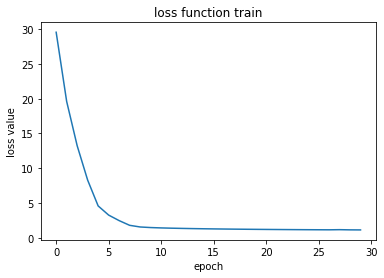

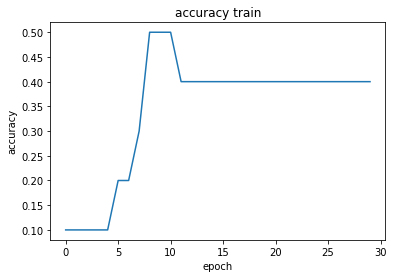

In [172]:
plt.plot(loss_history)
plt.title('loss function train')
plt.xlabel('epoch')
plt.ylabel('loss value')
plt.show()
plt.plot(accuracy_history)
plt.title('accuracy train')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

## Анализ результатов

In [141]:
a=np.array([0.1]*10)

In [144]:
np.where(a == max(a))[0][0]

0

In [ ]:
a = [[1,1,1]]
a = np.append(a, [[1,2,3]], axis = 0)
a

In [125]:
a= np.array([0,1,2,1,2,0])
np.where(a == 0)

(array([0, 5]),)

In [126]:
max([1,1])

1